In [35]:
import os
mingw_path = 'C:\\Program Files\\mingw-w64\\x86_64-5.3.0-posix-seh-rt_v4-rev0\\mingw64\\bin'
os.environ['PATH'] = mingw_path + ';' + os.environ['PATH']
%matplotlib inline
import pandas as pd
import numpy as np
from scipy import stats, integrate
import matplotlib.pyplot as plt
# import seaborn as sns
from numpy import sort
#import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
from xgboost import plot_importance
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
import random
from sklearn import metrics, preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.cluster import KMeans
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import RFECV

In [36]:
data_path = "F:\\Users\\ivann_000\\AnacondaProjects\\MLBootcamp4\\data"
X = pd.read_csv(data_path+"\\x_train.csv", sep=';', header=None)
y = pd.read_csv(data_path+"\\y_train.csv", sep=';', header=None)[0]
X = pd.DataFrame(preprocessing.minmax_scale(X, (0,1)))
X_new = SelectKBest(chi2, k=147).fit_transform(X, y)
X_new.shape

(3489, 147)

Feature ranking:
1. feature 8 (0.050363) - 0.012839
2. feature 104 (0.039955) - 0.040146
3. feature 125 (0.028498) - 0.032835
4. feature 134 (0.017155) - 0.030144
5. feature 56 (0.016136) - 0.018788
6. feature 102 (0.015836) - 0.009272
7. feature 3 (0.014838) - 0.008021
8. feature 17 (0.014454) - 0.021203
9. feature 0 (0.014359) - 0.023101
10. feature 146 (0.013647) - 0.008590
11. feature 127 (0.012876) - 0.007114
12. feature 32 (0.012183) - 0.007340
13. feature 92 (0.011970) - 0.007690
14. feature 103 (0.011334) - 0.009162
15. feature 135 (0.011276) - 0.012382
16. feature 55 (0.011237) - 0.017138
17. feature 59 (0.011218) - 0.007164
18. feature 23 (0.011059) - 0.006373
19. feature 15 (0.011044) - 0.007796
20. feature 42 (0.010864) - 0.006835
21. feature 50 (0.010643) - 0.006736
22. feature 62 (0.010185) - 0.008150
23. feature 61 (0.009905) - 0.006275
24. feature 84 (0.009889) - 0.006845
25. feature 86 (0.009763) - 0.005816
26. feature 33 (0.009637) - 0.008404
27. feature 49 (0.009636)

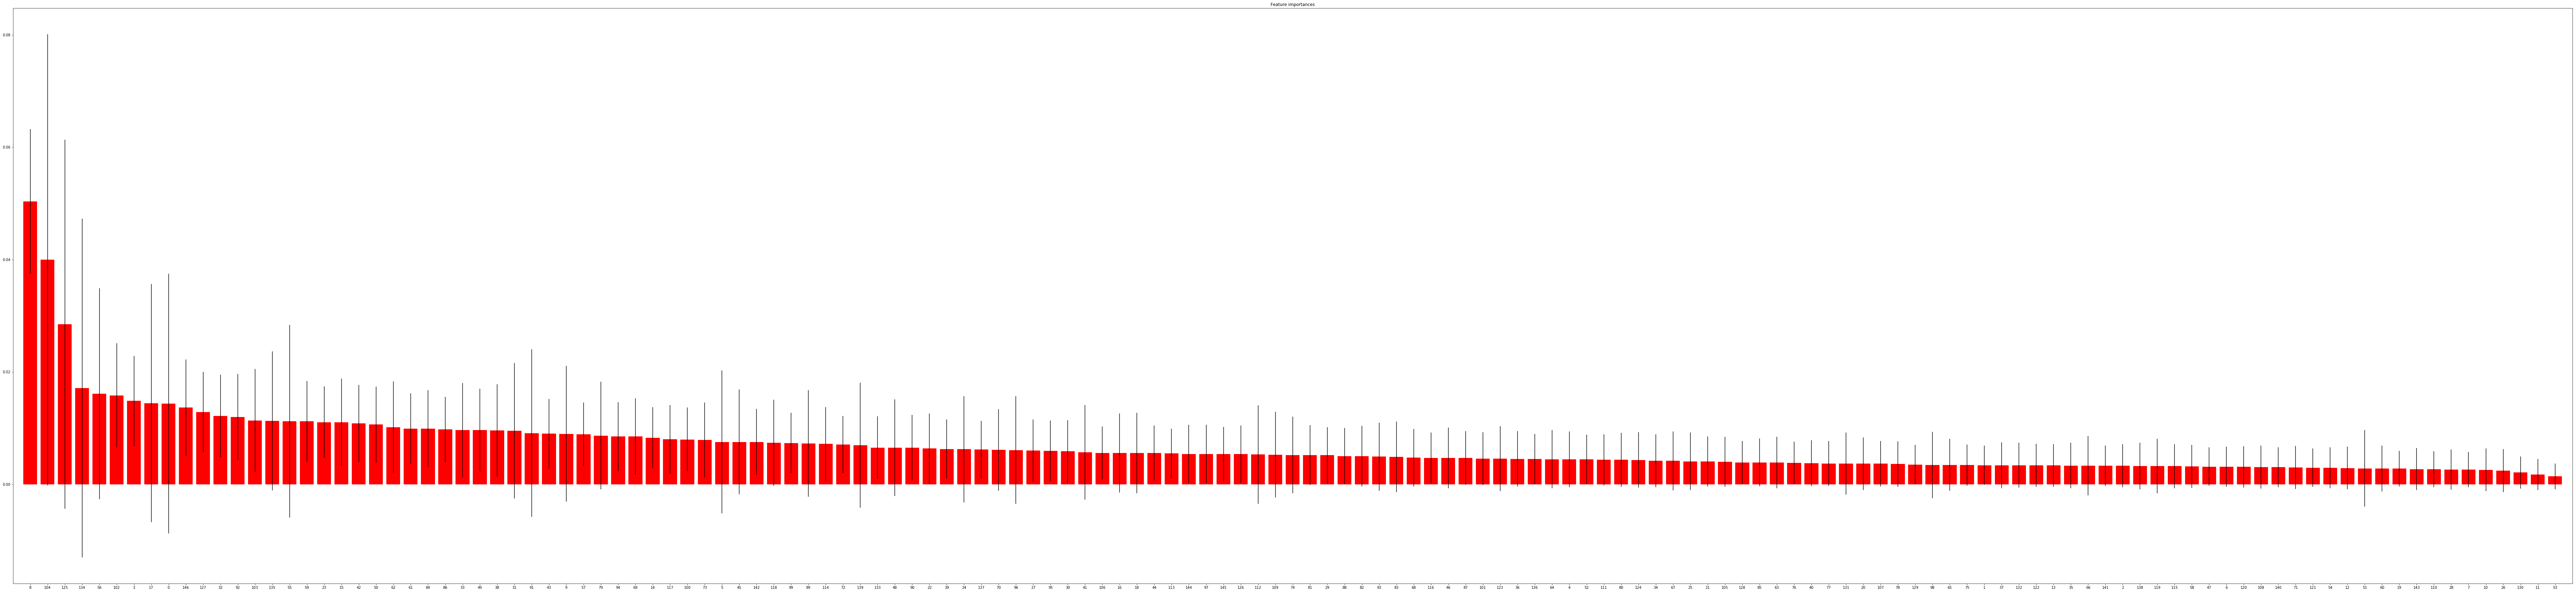

0.56032836960672017

In [19]:
model = RandomForestClassifier(n_estimators=1600,
                               n_jobs=5,
#                                oob_score=True,
                               max_features = None,
                               max_depth=15,
                               class_weight="balanced",
                               random_state=4242)
model.fit(X_new, y)
importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_new.shape[1]):
    print("%d. feature %d (%f) - %f" % (f + 1, indices[f], importances[indices[f]], std[indices[f]]))

# Plot the feature importances of the forest
plt.figure(figsize=(130,30))
plt.title("Feature importances")
plt.bar(range(X_new.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X_new.shape[1]), indices)
plt.xlim([-1, X_new.shape[1]])
plt.show()



cross_val_score(model, X_new, y, scoring='accuracy', cv=3).mean()

In [33]:
X = pd.read_csv(data_path+"\\x_train.csv", sep=';', header=None)
y = pd.read_csv(data_path+"\\y_train.csv", sep=';', header=None)[0]
X = pd.DataFrame(preprocessing.minmax_scale(X, (0,1)))
sel = VarianceThreshold(threshold=0.01)
X_new = sel.fit_transform(X,y)
X_new.shape
model = RandomForestClassifier(n_estimators=1600,
                               n_jobs=5,
#                                oob_score=True,
                               max_features = None,
                               max_depth=15,
                               class_weight="balanced",
                               random_state=4242)
model.fit(X_new, y)
importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_new.shape[1]):
    print("%d. feature %d (%f) - %f" % (f + 1, indices[f], importances[indices[f]], std[indices[f]]))

# Plot the feature importances of the forest
plt.figure(figsize=(130,30))
plt.title("Feature importances")
plt.bar(range(X_new.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X_new.shape[1]), indices)
plt.xlim([-1, X_new.shape[1]])
plt.show()



cross_val_score(model, X_new, y, scoring='accuracy', cv=3).mean()

KeyboardInterrupt: 

Optimal number of features : 145


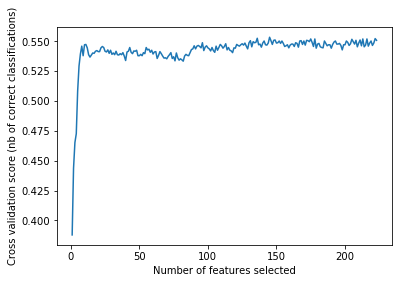

In [37]:
X = pd.read_csv(data_path+"\\x_train.csv", sep=';', header=None)
y = pd.read_csv(data_path+"\\y_train.csv", sep=';', header=None)[0]
X = pd.DataFrame(preprocessing.minmax_scale(X, (0,1)))
model = RandomForestClassifier(n_estimators=400,
                               n_jobs=5,
#                                oob_score=True,
                               max_features = None,
                               max_depth=15,
                               class_weight="balanced",
                               random_state=4242)
rfecv = RFECV(estimator=model, step=1, scoring='accuracy')
rfecv.fit(X, y)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [38]:
rfecv.get_support(indices=True)

array([  0,   1,   3,   4,   5,   6,   8,   9,  11,  12,  14,  15,  16,
        20,  21,  22,  23,  24,  25,  26,  29,  30,  31,  35,  37,  38,
        39,  40,  42,  44,  45,  48,  49,  50,  51,  52,  53,  54,  56,
        58,  60,  61,  62,  63,  65,  66,  67,  68,  69,  70,  71,  73,
        74,  75,  80,  82,  83,  86,  87,  88,  90,  91,  92,  93,  95,
        96, 100, 101, 105, 106, 107, 109, 110, 111, 112, 115, 117, 118,
       119, 120, 123, 124, 125, 126, 127, 128, 129, 132, 133, 134, 135,
       136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 149, 150, 151,
       152, 153, 155, 156, 157, 158, 159, 160, 161, 164, 166, 170, 173,
       174, 175, 178, 181, 182, 183, 189, 192, 193, 194, 195, 196, 197,
       202, 203, 206, 207, 208, 209, 211, 212, 213, 214, 215, 217, 219,
       221, 222], dtype=int64)